## Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

## !! FIRSTLY PARSE DATA TO DB FROM Task_4_part_1 !!

In [15]:
import pandas as pd
import sqlite3
import json
import matplotlib.pyplot as plt 
from pathlib import Path

In [32]:
if not Path('Statistic.db').is_file():
        raise Exception("DB not exist please go to Task_4_part_1")

In [22]:
def preprocess_data(df):
    df.reset_index(inplace=True,drop=True)
    for i in range (13,16):
        df[list(df)[i]] =  df[list(df)[i]].map(lambda x: json.loads(x))
    return df

In [23]:
connection = sqlite3.connect('Statistic.db')
df = pd.read_sql("SELECT * from t_statistic", connection,index_col='index')
preprocess_data(df)
df

,ТИК,Статистика по,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
0,Территориальная избирательная комиссия №1,Сумма,105510,83250,31626,1592,50032,1590,31437,1220,31807,0,0,"[6206, 18.79]","[19818, 60.01]","[5783, 17.51]"
1,Территориальная избирательная комиссия №1,УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,"[110, 18.39]","[345, 57.69]","[120, 20.07]"
2,Территориальная избирательная комиссия №1,УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,"[53, 11.94]","[326, 73.42]","[46, 10.36]"
3,Территориальная избирательная комиссия №1,УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,"[155, 25.92]","[332, 55.52]","[96, 16.05]"
4,Территориальная избирательная комиссия №1,УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,"[67, 20.81]","[171, 53.11]","[71, 22.05]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,Территориальная избирательная комиссия №30,УИК №2350,284,300,166,53,81,53,166,0,219,0,0,"[21, 9.59]","[184, 84.02]","[14, 6.39]"
2047,Территориальная избирательная комиссия №30,УИК №2351,132,150,86,27,37,27,86,2,111,0,0,"[7, 6.19]","[91, 80.53]","[13, 11.5]"
2048,Территориальная избирательная комиссия №30,УИК №2352,320,350,217,23,110,23,217,4,236,0,0,"[20, 8.33]","[193, 80.42]","[23, 9.58]"
2049,Территориальная избирательная комиссия №30,УИК №2355,485,500,335,12,153,12,335,2,345,0,0,"[23, 6.63]","[290, 83.57]","[32, 9.22]"


## - Явкa (%) по всем ТИК, результат отсортировать по убыванию:

Я́вка избира́телей — это отношение числа избирателей, принявших участие в выборах, к общему количеству граждан, имеющих право на участие в этих выборах.

In [24]:
common_stat=df.loc[df['Статистика по'] == 'Сумма'].groupby('ТИК').sum()
                         
def count_turnout(common_stat):
    count_of_voter=common_stat['Число избирателей, внесенных в список избирателей на момент окончания голосования']
    count_of_voter_who_vote=common_stat['Число действительных избирательных бюллетеней']+\
    common_stat['Число недействительных избирательных бюллетеней']
    return (count_of_voter/count_of_voter_who_vote)

var=count_turnout(common_stat)
var.sort_values(ascending=False)

ТИК
Территориальная избирательная комиссия №27    4.038980
Территориальная избирательная комиссия №6     4.003470
Территориальная избирательная комиссия №26    3.812603
Территориальная избирательная комиссия №12    3.805157
Территориальная избирательная комиссия №3     3.776874
Территориальная избирательная комиссия №24    3.768844
Территориальная избирательная комиссия №5     3.747326
Территориальная избирательная комиссия №11    3.741970
Территориальная избирательная комиссия №28    3.682922
Территориальная избирательная комиссия №14    3.656823
Территориальная избирательная комиссия №23    3.645697
Территориальная избирательная комиссия №16    3.558838
Территориальная избирательная комиссия №17    3.544755
Территориальная избирательная комиссия №25    3.465178
Территориальная избирательная комиссия №7     3.456412
Территориальная избирательная комиссия №21    3.438459
Территориальная избирательная комиссия №4     3.296809
Территориальная избирательная комиссия №29    3.287429
Террит

## - выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат (%, учитывать участки на которых проголосовало больше 100 человек) :

выбираем по-классике Бегловa Александрa Дмитриевичa,кого же еще?!

In [25]:
count_of_voter_who_vote = common_stat['Число действительных избирательных бюллетеней']+\
common_stat['Число недействительных избирательных бюллетеней']

stat_in_each = df.loc[(df['Статистика по'] != 'Сумма') & ((df['Число действительных избирательных бюллетеней']+\
df['Число недействительных избирательных бюллетеней'])[1]>100)]

stat_Beglov = stat_in_each['Беглов Александр Дмитриевич']
index_of_most_supportable_UEK_Beglov=stat_Beglov.map(lambda x: x[1]).idxmax()
df.iloc[[index_of_most_supportable_UEK_Beglov]]['Статистика по']

1417    УИК №343
Name: Статистика по, dtype: object

## -Найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна:

In [26]:
df1=df.loc[df['Статистика по'] != 'Сумма']
max_=df1.groupby(['ТИК']).max()
min_=df1.groupby(['ТИК']).min()
(count_turnout(max_)-count_turnout(min_)).idxmax()

'Территориальная избирательная комиссия №28'

## - Посчитайте дисперсию по явке для каждого ТИК (учитывать УИК):

In [27]:
df.loc[df['Статистика по'] != 'Сумма'].groupby('ТИК').apply(lambda x: count_turnout(x).var(ddof=0))

ТИК
Территориальная избирательная комиссия №1     0.496941
Территориальная избирательная комиссия №10    0.508135
Территориальная избирательная комиссия №11    0.602619
Территориальная избирательная комиссия №12    0.355320
Территориальная избирательная комиссия №13    0.513284
Территориальная избирательная комиссия №14    0.367862
Территориальная избирательная комиссия №15    0.615301
Территориальная избирательная комиссия №16    0.431204
Территориальная избирательная комиссия №17    0.876158
Территориальная избирательная комиссия №18    0.421581
Территориальная избирательная комиссия №19    1.210286
Территориальная избирательная комиссия №2     0.888094
Территориальная избирательная комиссия №20    0.377400
Территориальная избирательная комиссия №21    0.801790
Территориальная избирательная комиссия №22    0.762037
Территориальная избирательная комиссия №23    1.587527
Территориальная избирательная комиссия №24    0.888359
Территориальная избирательная комиссия №25    0.147543
Террит

## -Для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат

In [28]:
result_data_set = pd.DataFrame(columns=range(101)).T
for i in range (13,16):
    result_data_set=result_data_set.join(df[list(df)[i]].map(lambda x: round(x[1])).value_counts())
result_data_set.fillna(0)

,Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
0,1.0,0.0,2.0
1,6.0,0.0,4.0
2,6.0,0.0,5.0
3,2.0,0.0,11.0
4,13.0,0.0,10.0
...,...,...,...
96,0.0,1.0,0.0
97,0.0,0.0,0.0
98,0.0,2.0,0.0
99,0.0,0.0,0.0


## - Визуализируйте отношение - явка на УИК  →  результат кандидата

In [29]:
result_df=df.loc[df['Статистика по'] != 'Сумма']
df1=result_df.iloc[:,1:2].join(count_turnout(result_df.iloc[:,1:]).to_frame(),rsuffix="x").join(df.iloc[:,13:].apply(lambda x: list(map(lambda y: y[1],x))))
df1.rename(columns={0: 'Явка в %'}, inplace=True)
df1

,Статистика по,Явка в %,Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
1,УИК №1,3.015050,18.39,57.69,20.07
2,УИК №2,3.301802,11.94,73.42,10.36
3,УИК №3,3.498328,25.92,55.52,16.05
4,УИК №4,3.279503,20.81,53.11,22.05
5,УИК №5,3.646707,27.35,53.09,16.37
...,...,...,...,...,...
2046,УИК №2350,1.296804,9.59,84.02,6.39
2047,УИК №2351,1.168142,6.19,80.53,11.50
2048,УИК №2352,1.333333,8.33,80.42,9.58
2049,УИК №2355,1.397695,6.63,83.57,9.22


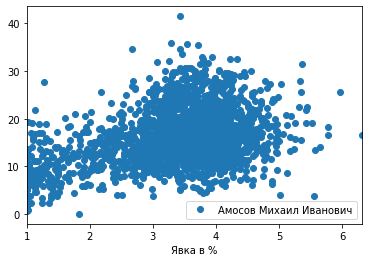

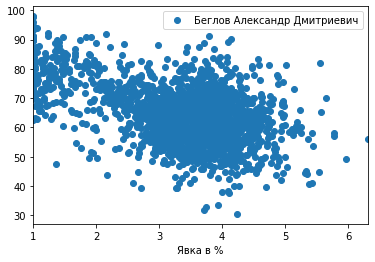

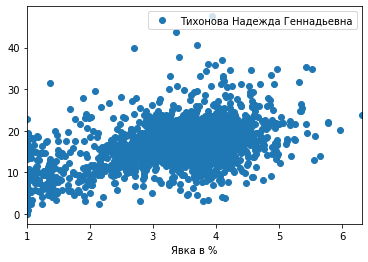

In [30]:
df1.plot(x='Явка в %', y='Амосов Михаил Иванович', style='o')
df1.plot(x='Явка в %', y='Беглов Александр Дмитриевич', style='o')
df1.plot(x='Явка в %', y='Тихонова Надежда Геннадьевна', style='o')
plt.show()